In [2]:
#Pakages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
df = pd.read_csv('healthcare_reviews.csv')

In [4]:
df

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3
...,...,...
995,My experience was terrible. I would not recomm...,5
996,The service was disappointing. I won't be comi...,4
997,"The service was okay, but nothing exceptional.",3
998,I have mixed feelings about my experience.,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1000.0,3.058,1.425015,1.0,2.0,3.0,4.0,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
df.shape

(1000, 2)

In [9]:
df.isnull().sum()

Review_Text    100
Rating           0
dtype: int64

In [10]:
df['Review_Text']=df['Review_Text'].str.lower()
df['Review_Text']

0            i have mixed feelings about my experience. 
1      the staff was caring and attentive. i couldn't...
2            i have mixed feelings about my experience. 
3            i have mixed feelings about my experience. 
4      the healthcare provider was excellent. i had a...
                             ...                        
995    my experience was terrible. i would not recomm...
996    the service was disappointing. i won't be comi...
997      the service was okay, but nothing exceptional. 
998          i have mixed feelings about my experience. 
999    the staff was caring and attentive. i couldn't...
Name: Review_Text, Length: 1000, dtype: object

In [11]:
df['Review_Text'] = df['Review_Text'].astype(str)
df['Review_Text'] = df['Review_Text'].apply(lambda x: re.sub('[^A-Za-z\s]', '', x))
df['Review_Text']

0             i have mixed feelings about my experience 
1      the staff was caring and attentive i couldnt b...
2             i have mixed feelings about my experience 
3             i have mixed feelings about my experience 
4      the healthcare provider was excellent i had a ...
                             ...                        
995    my experience was terrible i would not recomme...
996    the service was disappointing i wont be coming...
997        the service was okay but nothing exceptional 
998           i have mixed feelings about my experience 
999    the staff was caring and attentive i couldnt b...
Name: Review_Text, Length: 1000, dtype: object

In [12]:
import nltk
from nltk.tokenize import word_tokenize

In [13]:
df['Tokenized_Review_Text']=df.apply(lambda row:word_tokenize(row['Review_Text']),axis=1)
df['Tokenized_Review_Text']

0      [i, have, mixed, feelings, about, my, experience]
1      [the, staff, was, caring, and, attentive, i, c...
2      [i, have, mixed, feelings, about, my, experience]
3      [i, have, mixed, feelings, about, my, experience]
4      [the, healthcare, provider, was, excellent, i,...
                             ...                        
995    [my, experience, was, terrible, i, would, not,...
996    [the, service, was, disappointing, i, wont, be...
997    [the, service, was, okay, but, nothing, except...
998    [i, have, mixed, feelings, about, my, experience]
999    [the, staff, was, caring, and, attentive, i, c...
Name: Tokenized_Review_Text, Length: 1000, dtype: object

In [14]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
df['Stopwords_Removed'] = df['Tokenized_Review_Text'].apply(lambda x: [word for word in x if word not in stop_words])
df['Stopwords_Removed'].head()

0                        [mixed, feelings, experience]
1         [staff, caring, attentive, couldnt, happier]
2                        [mixed, feelings, experience]
3                        [mixed, feelings, experience]
4    [healthcare, provider, excellent, great, exper...
Name: Stopwords_Removed, dtype: object

In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
lemmatizer = WordNetLemmatizer()
df['Lemmatized_Reviews'] = df['Stopwords_Removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['Lemmatized_Reviews'].head()

0                         [mixed, feeling, experience]
1         [staff, caring, attentive, couldnt, happier]
2                         [mixed, feeling, experience]
3                         [mixed, feeling, experience]
4    [healthcare, provider, excellent, great, exper...
Name: Lemmatized_Reviews, dtype: object

In [17]:
df['POS_Tagged'] = df['Lemmatized_Reviews'].apply(nltk.pos_tag)
df['POS_Tagged']

0         [(mixed, JJ), (feeling, NN), (experience, NN)]
1      [(staff, NN), (caring, VBG), (attentive, JJ), ...
2         [(mixed, JJ), (feeling, NN), (experience, NN)]
3         [(mixed, JJ), (feeling, NN), (experience, NN)]
4      [(healthcare, NN), (provider, NN), (excellent,...
                             ...                        
995    [(experience, NN), (terrible, NN), (would, MD)...
996    [(service, NN), (disappointing, VBG), (wont, N...
997    [(service, NN), (okay, MD), (nothing, NN), (ex...
998       [(mixed, JJ), (feeling, NN), (experience, NN)]
999    [(staff, NN), (caring, VBG), (attentive, JJ), ...
Name: POS_Tagged, Length: 1000, dtype: object

In [18]:
df['Cleaned_Reviews'] = df['Lemmatized_Reviews'].apply(" ".join)
df['Cleaned_Reviews']

0                            mixed feeling experience
1              staff caring attentive couldnt happier
2                            mixed feeling experience
3                            mixed feeling experience
4      healthcare provider excellent great experience
                            ...                      
995      experience terrible would recommend provider
996            service disappointing wont coming back
997                  service okay nothing exceptional
998                          mixed feeling experience
999            staff caring attentive couldnt happier
Name: Cleaned_Reviews, Length: 1000, dtype: object

In [19]:

df.head()

,Review_Text,Rating,Tokenized_Review_Text,Stopwords_Removed,Lemmatized_Reviews,POS_Tagged,Cleaned_Reviews
0,i have mixed feelings about my experience,4,"[i, have, mixed, feelings, about, my, experience]","[mixed, feelings, experience]","[mixed, feeling, experience]","[(mixed, JJ), (feeling, NN), (experience, NN)]",mixed feeling experience
1,the staff was caring and attentive i couldnt b...,5,"[the, staff, was, caring, and, attentive, i, c...","[staff, caring, attentive, couldnt, happier]","[staff, caring, attentive, couldnt, happier]","[(staff, NN), (caring, VBG), (attentive, JJ), ...",staff caring attentive couldnt happier
2,i have mixed feelings about my experience,5,"[i, have, mixed, feelings, about, my, experience]","[mixed, feelings, experience]","[mixed, feeling, experience]","[(mixed, JJ), (feeling, NN), (experience, NN)]",mixed feeling experience
3,i have mixed feelings about my experience,5,"[i, have, mixed, feelings, about, my, experience]","[mixed, feelings, experience]","[mixed, feeling, experience]","[(mixed, JJ), (feeling, NN), (experience, NN)]",mixed feeling experience
4,the healthcare provider was excellent i had a ...,3,"[the, healthcare, provider, was, excellent, i,...","[healthcare, provider, excellent, great, exper...","[healthcare, provider, excellent, great, exper...","[(healthcare, NN), (provider, NN), (excellent,...",healthcare provider excellent great experience


In [20]:
from textblob import TextBlob

In [21]:
df['Sentiment_Polarity'] = df['Cleaned_Reviews'].apply(lambda x: TextBlob((x)).sentiment.polarity)
df['Sentiment_Polarity']

0      0.000000
1      0.400000
2      0.000000
3      0.000000
4      0.900000
         ...   
995   -1.000000
996   -0.300000
997    0.583333
998    0.000000
999    0.400000
Name: Sentiment_Polarity, Length: 1000, dtype: float64

In [22]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 1
    elif polarity == 0:
        return 0
    else:
        return -1

df['Sentiment'] = df['Sentiment_Polarity'].apply(categorize_sentiment)
df['Sentiment']

0      0
1      1
2      0
3      0
4      1
      ..
995   -1
996   -1
997    1
998    0
999    1
Name: Sentiment, Length: 1000, dtype: int64

In [23]:
df['Sentiment'].value_counts()

Sentiment
 1    415
-1    387
 0    198
Name: count, dtype: int64

In [24]:
x=df['Cleaned_Reviews']
y=df['Sentiment']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x_tfidf = tfidf_vectorizer.fit_transform(x)

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(random_state=42)
x_new, y_new = smote.fit_resample(x_tfidf, y)

In [29]:
df_new = pd.DataFrame({'Cleaned_Reviews': x_new, 'Sentiment': y_new})
df_new.shape

(1245, 2)

In [30]:
df_new['Sentiment'].value_counts()

Sentiment
 0    415
 1    415
-1    415
Name: count, dtype: int64

In [31]:
print("Original dataset size:", x.shape[0])
print("Resampled dataset size:", x_new.shape[0])

Original dataset size: 1000
Resampled dataset size: 1245


In [32]:
df_new.head()

,Cleaned_Reviews,Sentiment
0,"(0, 11)\t0.3461016023170191\n (0, 12)\t0.66...",0
1,"(0, 15)\t0.4472135954999579\n (0, 7)\t0.447...",1
2,"(0, 11)\t0.3461016023170191\n (0, 12)\t0.66...",0
3,"(0, 11)\t0.3461016023170191\n (0, 12)\t0.66...",0
4,"(0, 14)\t0.5420156283537017\n (0, 9)\t0.542...",1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

In [35]:
mnb_model = MultinomialNB()
mnb_model.fit(x_train, y_train)

MultinomialNB()

In [36]:
# Predictions on the training set
y_pred_train = mnb_model.predict(x_train)

In [37]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Training data:")
print(classification_report(y_train, y_pred_train))

print("\nConfusion Matrix on Training data:")
print(confusion_matrix(y_train, y_pred_train))

Training Accuracy: 1.00

Classification Report on Training data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       344
           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       325

    accuracy                           1.00       996
   macro avg       1.00      1.00      1.00       996
weighted avg       1.00      1.00      1.00       996


Confusion Matrix on Training data:
[[344   0   0]
 [  0 327   0]
 [  0   0 325]]


In [38]:
# Predictions on the testing set
y_pred_test = mnb_model.predict(x_test)

accuracy_train = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {accuracy_train:.2f}")

print("\nClassification Report on Testing data:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix on Testing data:")
print(confusion_matrix(y_test, y_pred_test))

Testing Accuracy: 1.00

Classification Report on Testing data:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        71
           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        90

    accuracy                           1.00       249
   macro avg       1.00      1.00      1.00       249
weighted avg       1.00      1.00      1.00       249


Confusion Matrix on Testing data:
[[71  0  0]
 [ 0 88  0]
 [ 0  0 90]]


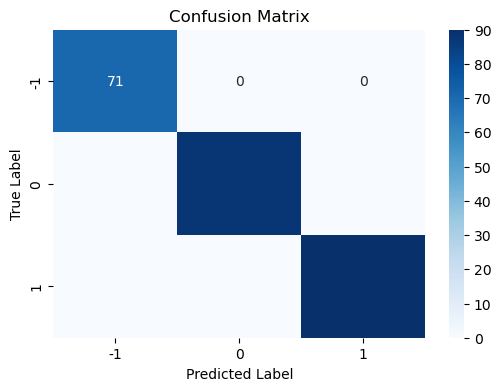

In [39]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap = 'Blues', xticklabels=[-1,0,1], yticklabels=[-1,0,1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [40]:
from wordcloud import WordCloud

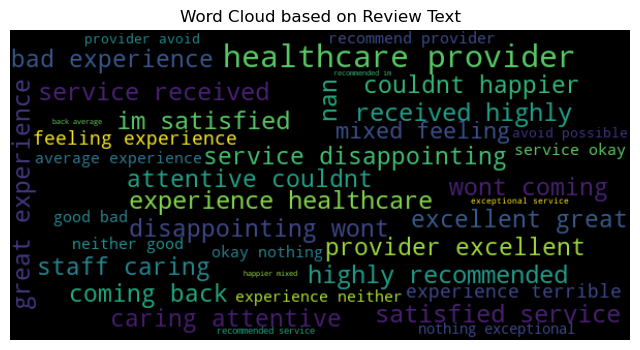

In [41]:
all_words = " ".join(df['Cleaned_Reviews'])

wordcloud = WordCloud(width=600, height=300, random_state=42, max_font_size=30, background_color='black').generate(all_words)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud based on Review Text')
plt.show()

In [42]:
#final model
final_model = MultinomialNB()
final_model.fit(x_new, y_new)

MultinomialNB()

In [44]:
classes = final_model.classes_
print("Classes:", classes)

class_prior = final_model.class_log_prior_
print("Class Prior Probabilities:", np.exp(class_prior))

alpha = final_model.alpha
print("Alpha Parameter:", alpha)

Classes: [-1  0  1]
Class Prior Probabilities: [0.33333333 0.33333333 0.33333333]
Alpha Parameter: 1.0
